# **Análisis del uso de las energías en España y su relación con las energías renovables.**

### Trabajo por **Álvaro Mendoza González** y **Jesús Enrique Cartas Rascón**


---


En este análisis pretendemos entender qué energías se utlizan en España principalmente, cuánto y cómo. Intentaremos también arrojar luz en el tema de las energías renovables y su relación con las energías clásicas, para ver en qué medida merece la pena dar el salto. 

Todos los datos provienen del [**Eurostat**](https://ec.europa.eu/eurostat), una gran fuente de datos estadísticos a nivel europeo.




# Tabla de contenidos

> Introducción

> Cómo y cuánto se usa cada tipo de energía

> Cómo de accesible es esta energía a los diferentes sectores


> Cómo de eficiente es cada tipo de energía

> Cuales son los niveles de contaminación producidos por cada tipo de energía

> Cómo evoluciona el ritmo de uso de las energías renovables

> Cómo se relacionan éstas energías con las energías renovables

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

# 1. Introducción

Dedicaremos esta primera parte a importar las librerías y archivos necesarios para el análisis, así como a definir un conjunto de funciones que nos sirvan de ayuda y agilicen el proceso de desarrollo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_url = "https://raw.githubusercontent.com/jesi-rgb/proyectoTGI/master/"

In [3]:
electricity_prices_household = pd.read_csv(base_url + "energy_data/electricity_prices_household.csv", delimiter=';')
gas_prices_household = pd.read_csv(base_url + "energy_data/gas_prices_household.csv", delimiter=';')
consum = pd.read_csv('energy_data/consumo_energias_sector.csv', delimiter=';')
energy_cons = pd.read_csv("energy_data/consumo_todas_energias.csv", delimiter=';')

In [4]:
def consulta_por_valor_columna(dataframe, valor, nombre_columna):
    return dataframe[dataframe[nombre_columna] == valor]

In [5]:
def castear_a_float(input_list):
    '''Recibe una lista de valores y devuelve otra con los valores interpretados como flotantes.
    Esta función NO edita la columna, devuelve una nueva. La columna del dataframe original deberá ser sobreescrita pertinentemente.
    ''' 
    return input_list.apply(float)

In [6]:
def string_replace_columna(columna, valor_a_buscar, valor_sustituto):
    '''Busca espacios en la columna y los elimina
    Esta función NO edita la columna, devuelve una nueva. La columna del dataframe original deberá ser sobreescrita pertinentemente.
    '''
    return columna.str.replace(valor_a_buscar, valor_sustituto)

In [7]:
def eliminar_valores_invalidos(dataframe, columna, valor_invalido, valor_nuevo):
    '''Sustituye las instancias de valor_invalido por las de valor nuevo en la columna. Por ejemplo, para sustituir \':\' por -1
    Es recomendable pasar el valor nuevo como tipo igual al que tiene el data frame, para que luego los casteos no se hagan complicados
    '''
    dataframe.loc[dataframe[columna] == valor_invalido, columna] = valor_nuevo

In [8]:
text_arguments = {
    "fontfamily":["Consolas", "Inconsolata"],
    "fontsize":18
}

In [9]:
tableau20 = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]) 
tableau20 = tableau20/255

In [10]:
def annot_max(x,y, ax=None, xPos=1, yPos=1):
    xmax = x[pd.Series.idxmax(y)]
    ymax = y.max()
    text = "Max: x={0:s}, y={1:.3f}".format(xmax, float(ymax))
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square", pad=0.3, fc="w" , ec="k", lw=0.52)
    arrowprops = dict(arrowstyle= "-|>", connectionstyle="angle, angleA=0, angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top" )
    ax.annotate(text, xy=(xmax, ymax), xytext=(xPos, yPos), **kw)

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

# 2. Cómo y cuánto se usa cada tipo de energía

En esta sección trataremos de hallar las proporciones de uso de las energías más importantes en España: la energía eléctrica, el consumo de gas.

In [11]:
consum_es = consulta_por_valor_columna(consum, 'ES', 'geo\\TIME_PERIOD')

In [12]:
consum_es

,freq,nrg_bal,siec,unit,geo\TIME_PERIOD,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
60,A,FC_E,TOTAL,KTOE,ES,91561.026,93937.419,90434.218,83936.267,85156.547,81957.200,78446.010,75859.230,74943.175,75960.969,78005.390,79397.426
61,A,FC_IND_E,TOTAL,KTOE,ES,24615.634,26627.198,25076.089,20693.264,20776.975,20602.546,20088.387,19587.584,19293.488,18205.959,18378.539,18973.788
62,A,FC_OTH_CP_E,TOTAL,KTOE,ES,8937.271,8828.268,9306.095,9414.431,9806.087,10197.481,10036.261,9595.893,8924.074,10268.907,10892.591,10412.985
63,A,FC_OTH_HH_E,TOTAL,KTOE,ES,15629.050,15672.903,15542.505,15967.814,16964.172,15662.135,15559.386,14918.154,14814.004,14998.213,15208.781,15435.162
64,A,FC_TRA_E,TOTAL,KTOE,ES,37870.440,38898.001,37022.456,34531.317,33877.104,32058.462,29298.283,28058.785,28223.339,29517.952,30643.218,31722.806


In [13]:
consum_es = consum_es.melt(
    id_vars=['freq', 'nrg_bal', 'siec', 'unit', 'geo\\TIME_PERIOD'],
    var_name='Años',
    value_name='Consumo'
)

In [14]:
consum_es.Consumo = castear_a_float(consum_es.Consumo)

In [15]:
consum_es_sector = consum_es.groupby('nrg_bal', as_index=False).mean().sort_values('Consumo')

In [16]:
consum_es_sector.nrg_bal = consum_es_sector['nrg_bal'].replace({'FC_E': 'Total',
'FC_IND_E': 'Industry',
'FC_OTH_CP_E': 'Commercial and Public services',
'FC_OTH_HH_E': 'Household',
'FC_TRA_E': 'Transport'})

In [17]:
consum_es_sector

,nrg_bal,Consumo
2,Commercial and Public services,9718.362000
3,Household,15531.023250
1,Industry,21076.620917
4,Transport,32643.513583
0,Total,82466.239750


In [18]:
transporte = consum_es_sector.Consumo.iloc[3]
total = consum_es_sector.Consumo.iloc[0]

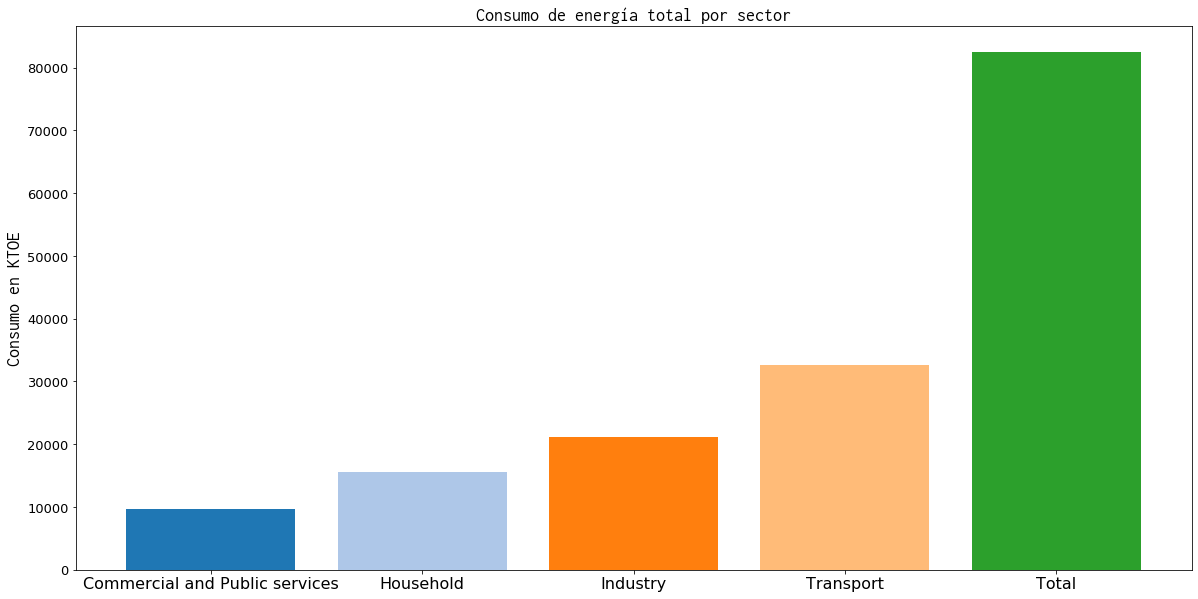

In [19]:
plt.figure(figsize=(20, 10))
plt.bar(consum_es_sector.nrg_bal.drop_duplicates(), consum_es_sector.Consumo, color=tableau20)
plt.title('Consumo de energía total por sector', text_arguments) 
plt.ylabel('Consumo en KTOE', text_arguments)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=13)

##### Consumo de energía eléctrica total #####

In [20]:
consum_elect = consulta_por_valor_columna(energy_cons, 'E7000', 'siec')
consum_elect_es = consulta_por_valor_columna(consum_elect, 'ES', 'geo\\TIME_PERIOD')

##### Consumo de gas #####

In [21]:
consum_gas = consulta_por_valor_columna(energy_cons, 'G3000', 'siec')
consum_gas_es = consulta_por_valor_columna(consum_gas, 'ES', 'geo\\TIME_PERIOD')

##### Consumo de energías renovables #####

In [22]:
consum_renovables = consulta_por_valor_columna(energy_cons, 'RA000', 'siec')
consum_renovables_es = consulta_por_valor_columna(consum_renovables, 'ES', 'geo\\TIME_PERIOD')

In [23]:
consum_elect_es = consum_elect_es.melt(
    id_vars=['freq', 'nrg_bal', 'siec', 'unit', 'geo\\TIME_PERIOD'],
    var_name='Años',
    value_name='Consumo'
)

consum_gas_es = consum_gas_es.melt(
    id_vars=['freq', 'nrg_bal', 'siec', 'unit', 'geo\\TIME_PERIOD'],
    var_name='Años',
    value_name='Consumo'
)

consum_renovables_es = consum_renovables_es.melt(
    id_vars=['freq', 'nrg_bal', 'siec', 'unit', 'geo\\TIME_PERIOD'],
    var_name='Años',
    value_name='Consumo'
)

In [24]:
consum_elect_es.Consumo = castear_a_float(consum_elect_es.Consumo)
consum_gas_es.Consumo = castear_a_float(consum_gas_es.Consumo)
consum_renovables_es.Consumo = castear_a_float(consum_renovables_es.Consumo)

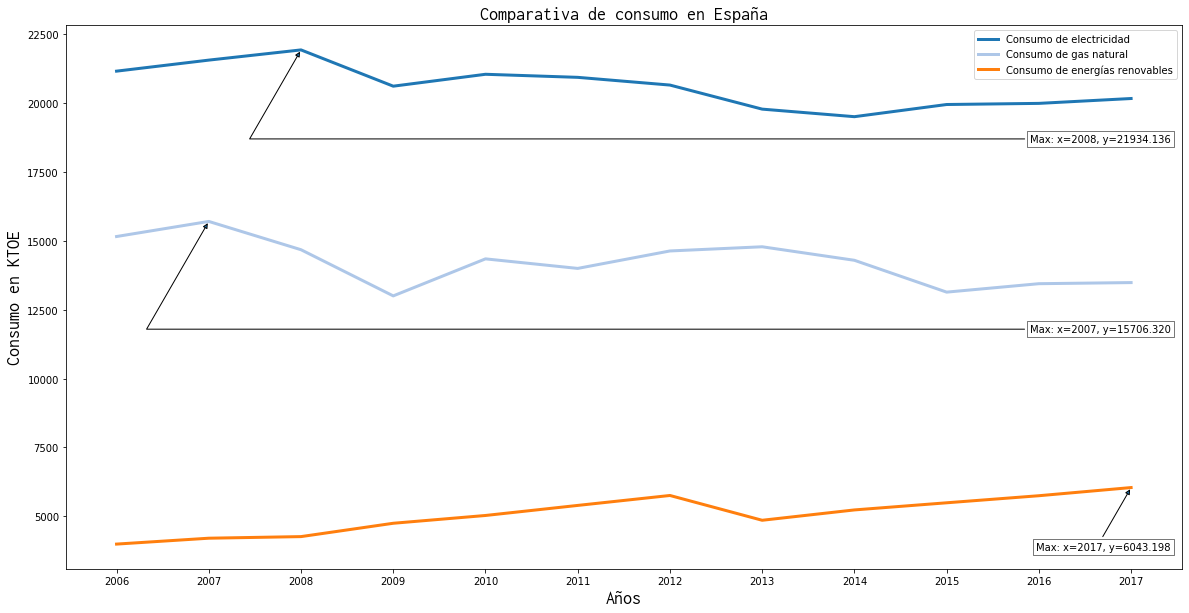

In [25]:
y_data = [consum_elect_es.Consumo,consum_gas_es.Consumo, consum_renovables_es.Consumo]

plt.figure(figsize=(20, 10))
for y in range(len(y_data)):
    plt.plot(consum_elect_es.Años, y_data[y], color=tableau20[y], linewidth=3)
    
plt.title('Comparativa de consumo en España', text_arguments)
plt.xlabel('Años', text_arguments)
plt.ylabel('Consumo en KTOE', text_arguments)
plt.legend(['Consumo de electricidad', 'Consumo de gas natural', 'Consumo de energías renovables'])

annot_max(consum_elect_es.Años, consum_elect_es.Consumo, xPos=0.99, yPos=0.8)
annot_max(consum_gas_es.Años, consum_gas_es.Consumo, xPos=0.99, yPos=0.45)
annot_max(consum_renovables_es.Años, consum_renovables_es.Consumo, xPos=0.99, yPos=0.05)

In [26]:
energy_cons_es = energy_cons[energy_cons['geo\\TIME_PERIOD'] == 'ES'].copy()

In [27]:
energy_cons_es = energy_cons_es.melt(
    id_vars=['freq', 'nrg_bal', 'siec', 'unit', 'geo\\TIME_PERIOD'],
    var_name='Años',
    value_name='Consumo'
)

In [28]:
eliminar_valores_invalidos(energy_cons_es, 'Consumo', ': ', np.NaN)
eliminar_valores_invalidos(energy_cons_es, 'Consumo', ': z', np.NaN)

In [29]:
energy_cons_es.Consumo = castear_a_float(energy_cons_es.Consumo)

In [30]:
bar_height_cons = energy_cons_es.groupby('siec', as_index=False).mean()

In [31]:
bar_height_cons = bar_height_cons.sort_values('Consumo')

In [32]:
bar_height_cons.siec =  bar_height_cons['siec'].replace({'C0000X0350-0370': 'Solid fossil fuels',
'C0350-0370': 'Manufactured gases',
'P1000': 'Peat and peat products',
'S2000': 'Oil shale and oil sands',
'G3000': 'Natural gas',
'O4000XBIO': 'Oil and petroleum products',
'RA000': 'Renewables and biofuels',
'W6100_6220': 'Non-renewable waste',
'E7000': 'Electricity',
'H8000': 'Heat',
'N900H': 'Nuclear heat'})

In [33]:
bar_height_cons = bar_height_cons.drop(bar_height_cons[bar_height_cons['Consumo'] < 2].index)

<BarContainer object of 8 artists>

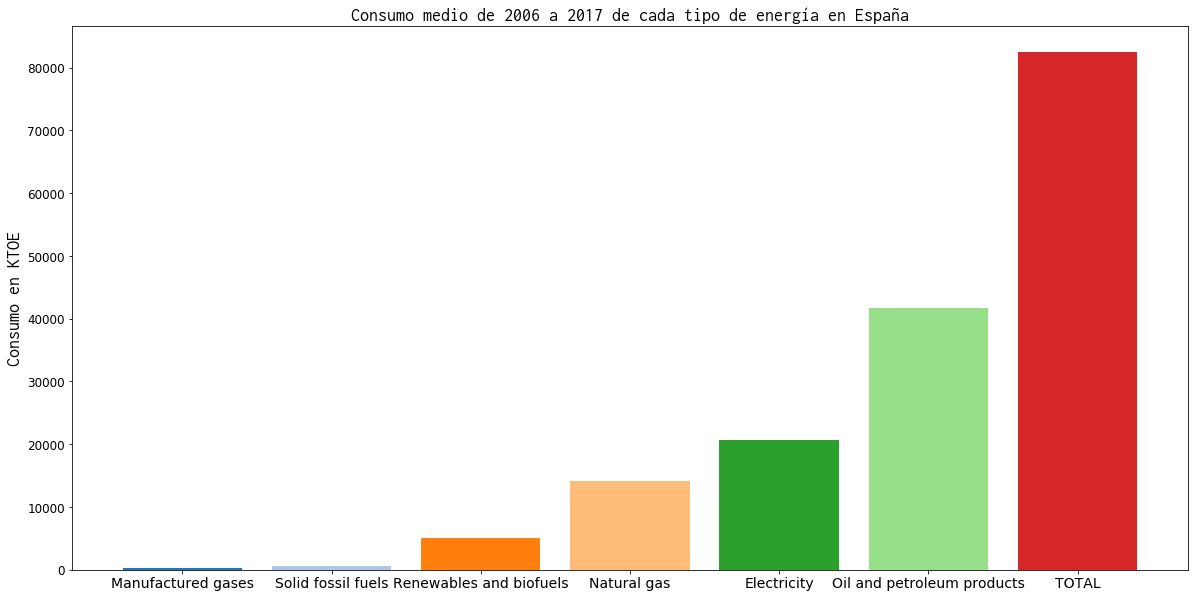

In [34]:
plt.figure(figsize=(20, 10))
plt.title('Consumo medio de 2006 a 2017 de cada tipo de energía en España', text_arguments)
plt.ylabel('Consumo en KTOE', text_arguments)
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=14)
plt.bar(bar_height_cons.siec.drop_duplicates(), height=bar_height_cons.Consumo, color=tableau20)

### De estas gráficas podemos concluir que:
- El sector que más consume es el de transporte, ocupando un 40% del total consumido y que el petróleo es la fuente de energía más utilizada, representando cerca de un 50% del total.
    - Esto puede deberse a la gran cantidad de recursos turísticos que ofrece España, así como al hecho de que no es un país particularmente industrial.
- El consumo de electricidad y de gas siguen líneas prácticamente idénticas en el tiempo, manteniendo un tendencia estable.
- Las energías renovables están empezando a consumirse cada vez más, aunque muy su crecimiento es bastante lento.

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

# 3. Cómo de accesible es esta energía a los diferentes sectores

In [35]:
electricity_prices_household_es = consulta_por_valor_columna(electricity_prices_household, 'ES', 'geo\\time')
gas_prices_household_es = consulta_por_valor_columna(gas_prices_household, 'ES', 'geo\\time')

In [36]:
electricity_prices_household_es_eur = consulta_por_valor_columna(electricity_prices_household_es, 'EUR', 'currency')
electricity_prices_household_es_eur_xtax = consulta_por_valor_columna(electricity_prices_household_es_eur, 'X_TAX', 'tax')


gas_prices_household_es_eur = consulta_por_valor_columna(gas_prices_household_es, 'EUR', 'currency')
gas_prices_household_es_eur_xtax = consulta_por_valor_columna(gas_prices_household_es_eur, 'X_TAX', 'tax')

In [37]:
electricity_prices_household_es_eur_xtax = electricity_prices_household_es_eur_xtax.melt(
    id_vars=['product', 'consom', 'unit', 'tax', 'currency', 'geo\\time'],
    var_name='Semestres',
    value_name='Precio' 
)

In [38]:
gas_prices_household_es_eur_xtax = gas_prices_household_es_eur_xtax.melt(
    id_vars=['product', 'consom', 'unit', 'tax', 'currency', 'geo\\time'],
    var_name='Semestres',
    value_name='Precio' 
)

In [39]:
eliminar_valores_invalidos(electricity_prices_household_es_eur_xtax, 'Precio', ": ", np.NaN)
eliminar_valores_invalidos(electricity_prices_household_es_eur_xtax, 'Precio', ": u", np.NaN)

electricity_prices_household_es_eur_xtax.Precio = string_replace_columna(electricity_prices_household_es_eur_xtax.Precio, 'p', "")
electricity_prices_household_es_eur_xtax.Precio = string_replace_columna(electricity_prices_household_es_eur_xtax.Precio, " ", "")

In [40]:
electricity_prices_household_es_eur_xtax.Precio = castear_a_float(electricity_prices_household_es_eur_xtax.Precio)

In [41]:
eliminar_valores_invalidos(gas_prices_household_es_eur_xtax, 'Precio', ": ", np.NaN)
eliminar_valores_invalidos(gas_prices_household_es_eur_xtax, 'Precio', ": u", np.NaN)

gas_prices_household_es_eur_xtax.Precio = string_replace_columna(gas_prices_household_es_eur_xtax.Precio, 'p', "")
gas_prices_household_es_eur_xtax.Precio = string_replace_columna(gas_prices_household_es_eur_xtax.Precio, " ", "")

In [42]:
gas_prices_household_es_eur_xtax.Precio = castear_a_float(gas_prices_household_es_eur_xtax.Precio)

In [43]:
electricity_prices_household_es_eur_xtax = electricity_prices_household_es_eur_xtax[electricity_prices_household_es_eur_xtax['Semestres'] != '2007S1']

In [44]:
less_1k = (consulta_por_valor_columna(electricity_prices_household_es_eur_xtax, 4161901, 'consom')).Precio
from_1k_to_2k = (consulta_por_valor_columna(electricity_prices_household_es_eur_xtax, 4161902, 'consom')).Precio
from_2k_to_5k = (consulta_por_valor_columna(electricity_prices_household_es_eur_xtax, 4161903, 'consom')).Precio
from_5k_to_15k = (consulta_por_valor_columna(electricity_prices_household_es_eur_xtax, 4161904, 'consom')).Precio
over_15k = (consulta_por_valor_columna(electricity_prices_household_es_eur_xtax, 4161905, 'consom')).Precio

In [45]:
semestres_elec = (electricity_prices_household_es_eur_xtax.Semestres).drop_duplicates()

In [46]:
semestres_elec = semestres_elec.iloc[::-1]
less_1k = less_1k.iloc[::-1]
from_1k_to_2k = from_1k_to_2k.iloc[::-1] 
from_2k_to_5k = from_2k_to_5k.iloc[::-1] 
from_5k_to_15k = from_5k_to_15k.iloc[::-1]
over_15k = over_15k.iloc[::-1]

In [47]:
avg_elec = np.array([less_1k, from_1k_to_2k, from_2k_to_5k, from_5k_to_15k, over_15k])
avg_elec = np.mean(avg_elec, axis=0)
avg_elec = pd.Series(avg_elec)

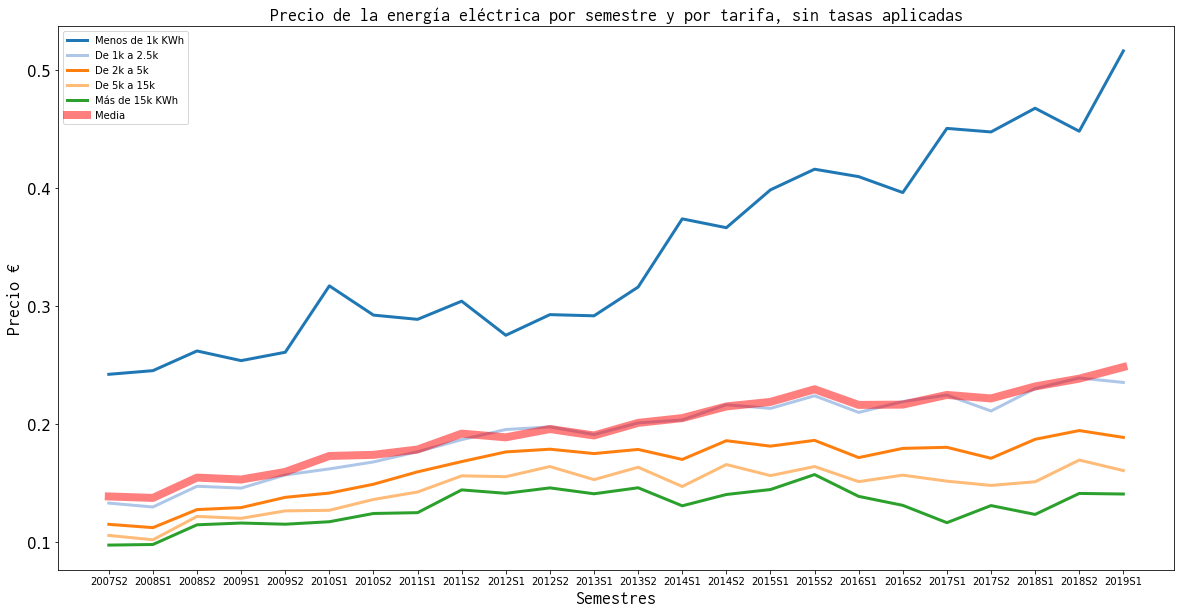

In [48]:
y_data = [less_1k, from_1k_to_2k, from_2k_to_5k, from_5k_to_15k, over_15k]

fig = plt.figure(figsize=(20, 10))

for y in range(len(y_data)):
    plt.plot(semestres_elec, y_data[y], color=tableau20[y], linewidth=3)
del y_data
plt.plot(semestres_elec, avg_elec, 'r-', linewidth=8, alpha=0.5)

#annot_max(semestres_elec, less_1k)

plt.title('Precio de la energía eléctrica por semestre y por tarifa, sin tasas aplicadas', text_arguments)
plt.legend(['Menos de 1k KWh', 'De 1k a 2.5k', 'De 2k a 5k', 'De 5k a 15k', 'Más de 15k KWh', 'Media'])
plt.xlabel('Semestres', text_arguments)
plt.ylabel('Precio €', text_arguments)
plt.tick_params(axis='y', labelsize=15)

##### Preparamos los datos del gas #####

In [49]:
gas_prices_household_es_eur_xtax_gj = consulta_por_valor_columna(gas_prices_household_es_eur_xtax, 'GJ_GCV','unit')

In [50]:
gas_prices_household_es_eur_xtax_gj = gas_prices_household_es_eur_xtax_gj[(gas_prices_household_es_eur_xtax_gj['Semestres'] != '2019S1') & (gas_prices_household_es_eur_xtax_gj['Semestres'] != '2007S1')]

In [51]:
semestres_gas = (gas_prices_household_es_eur_xtax_gj.Semestres).drop_duplicates()

In [52]:
less_20GJ = (consulta_por_valor_columna(gas_prices_household_es_eur_xtax_gj, 4141901, 'consom')).Precio
from_20GJ_to_200GJ = (consulta_por_valor_columna(gas_prices_household_es_eur_xtax_gj, 4141902, 'consom')).Precio
over_200GJ = (consulta_por_valor_columna(gas_prices_household_es_eur_xtax_gj, 4141903, 'consom')).Precio

In [53]:
less_20GJ = less_20GJ.iloc[::-1]
from_20GJ_to_200GJ = from_20GJ_to_200GJ.iloc[::-1]
over_200GJ = over_200GJ.iloc[::-1]
semestres_gas = semestres_gas.iloc[::-1]

In [54]:
averages = np.array([less_20GJ, from_20GJ_to_200GJ, over_200GJ])
averages = (np.mean(averages, axis=0))
averages = pd.Series(averages)

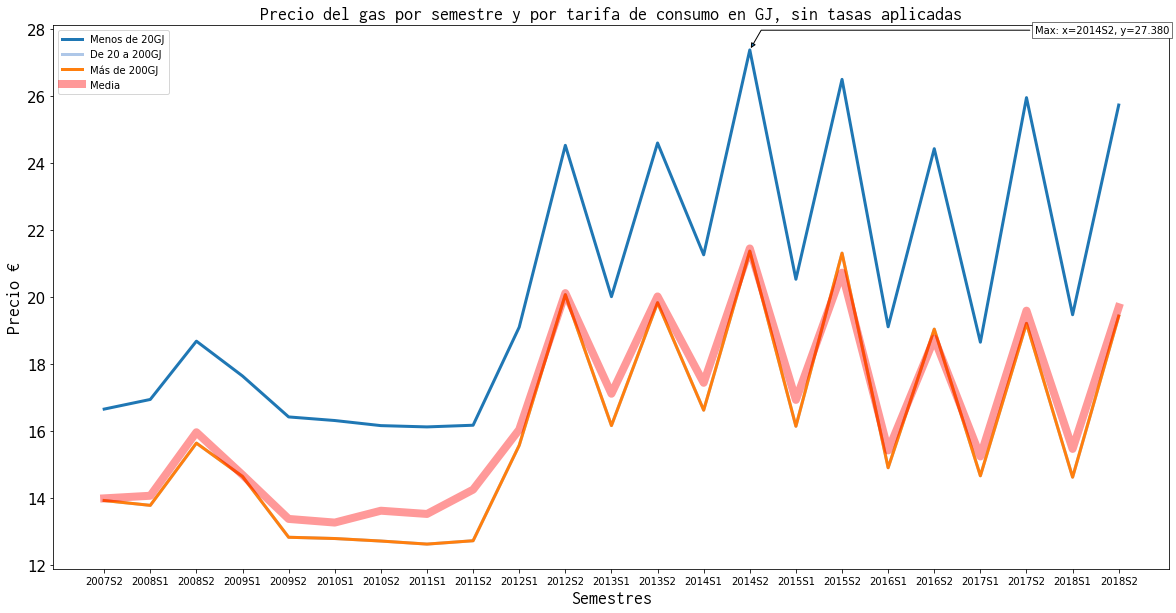

In [55]:
y_data=[less_20GJ, from_20GJ_to_200GJ, from_20GJ_to_200GJ]

fig = plt.figure(figsize=(20, 10))
for y in range(len(y_data)):
    plt.plot(semestres_gas, y_data[y], color=tableau20[y], linewidth=3)
del y_data

plt.plot(semestres_gas, averages, 'r-', linewidth=8, alpha=0.4)
annot_max(semestres_gas, less_20GJ)

plt.title('Precio del gas por semestre y por tarifa de consumo en GJ, sin tasas aplicadas', text_arguments)
plt.legend(['Menos de 20GJ', 'De 20 a 200GJ', 'Más de 200GJ', 'Media'], loc='upper left')
plt.xlabel('Semestres', text_arguments)
plt.ylabel('Precio €', text_arguments)
plt.tick_params(axis='y', labelsize=15)

In [56]:
elec_prices_copy = electricity_prices_household_es_eur_xtax.copy()

In [57]:
elec_prices_copy.Semestres = elec_prices_copy.Semestres.str[:4]

In [58]:
elec_prices_anual = elec_prices_copy.groupby(['consom', 'Semestres'], as_index=False).mean()

In [59]:
elec_prices_anual_less_1k = consulta_por_valor_columna(elec_prices_anual.copy(), 4161901, 'consom')
elec_prices_anual_1k_to_2k = consulta_por_valor_columna(elec_prices_anual.copy(), 4161902, 'consom')
elec_prices_anual_2k_to_5k = consulta_por_valor_columna(elec_prices_anual.copy(), 4161903, 'consom')
elec_prices_anual_5k_to_15k = consulta_por_valor_columna(elec_prices_anual.copy(), 4161904, 'consom')
elec_prices_anual_over_15k = consulta_por_valor_columna(elec_prices_anual.copy(), 4161905, 'consom')

In [60]:
avg_cons_elec = np.array([elec_prices_anual_less_1k.Precio, elec_prices_anual_1k_to_2k.Precio, elec_prices_anual_2k_to_5k.Precio, elec_prices_anual_2k_to_5k.Precio, elec_prices_anual_5k_to_15k.Precio, elec_prices_anual_over_15k.Precio])
avg_cons_elec = np.mean(avg_cons_elec, axis=0)
avg_cons_elec = pd.Series(avg_cons_elec)

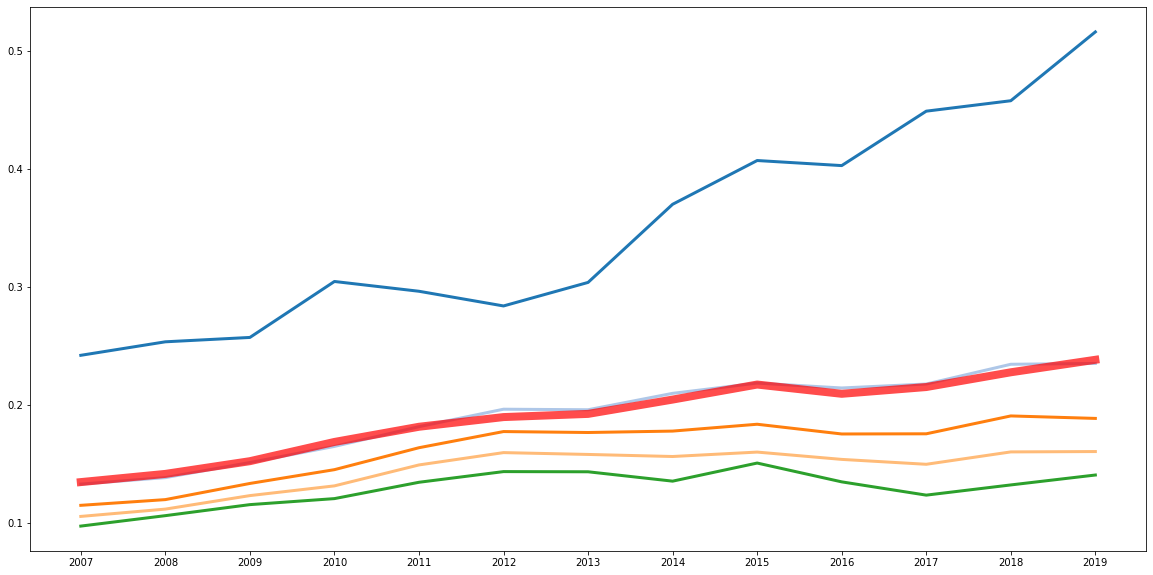

In [61]:
y_data = [  elec_prices_anual_less_1k.Precio,
        elec_prices_anual_1k_to_2k.Precio,
        elec_prices_anual_2k_to_5k.Precio,
        elec_prices_anual_5k_to_15k.Precio,
        elec_prices_anual_over_15k.Precio]

plt.figure(figsize=(20,10))

for y in range(len(y_data)):
    plt.plot(elec_prices_anual_less_1k.Semestres, y_data[y], color=tableau20[y], linewidth=3)
plt.plot(elec_prices_anual_less_1k.Semestres, avg_cons_elec, 'r-', linewidth=8, alpha=0.7)

In [62]:
gas_prices_copy = gas_prices_household_es_eur_xtax.copy()

In [63]:
gas_prices_copy.Semestres = gas_prices_copy.Semestres.str[:4]

In [64]:
gas_prices_anual = gas_prices_copy.groupby(['consom', 'Semestres'], as_index=False).mean()

In [65]:
gas_prices_anual_less_20gj = consulta_por_valor_columna(gas_prices_anual.copy(), 4141901, 'consom')
gas_prices_anual_20gj_to_200gl = consulta_por_valor_columna(gas_prices_anual.copy(), 4141902, 'consom')
gas_prices_anual_over_200gl = consulta_por_valor_columna(gas_prices_anual.copy(), 4141903, 'consom')

In [66]:
avg_cons_gas = np.array([gas_prices_anual_less_20gj.Precio, gas_prices_anual_20gj_to_200gl.Precio, gas_prices_anual_over_200gl.Precio, gas_prices_anual_over_200gl.Precio])
avg_cons_gas = np.mean(avg_cons_gas, axis=0)
avg_cons_gas = pd.Series(avg_cons_gas)

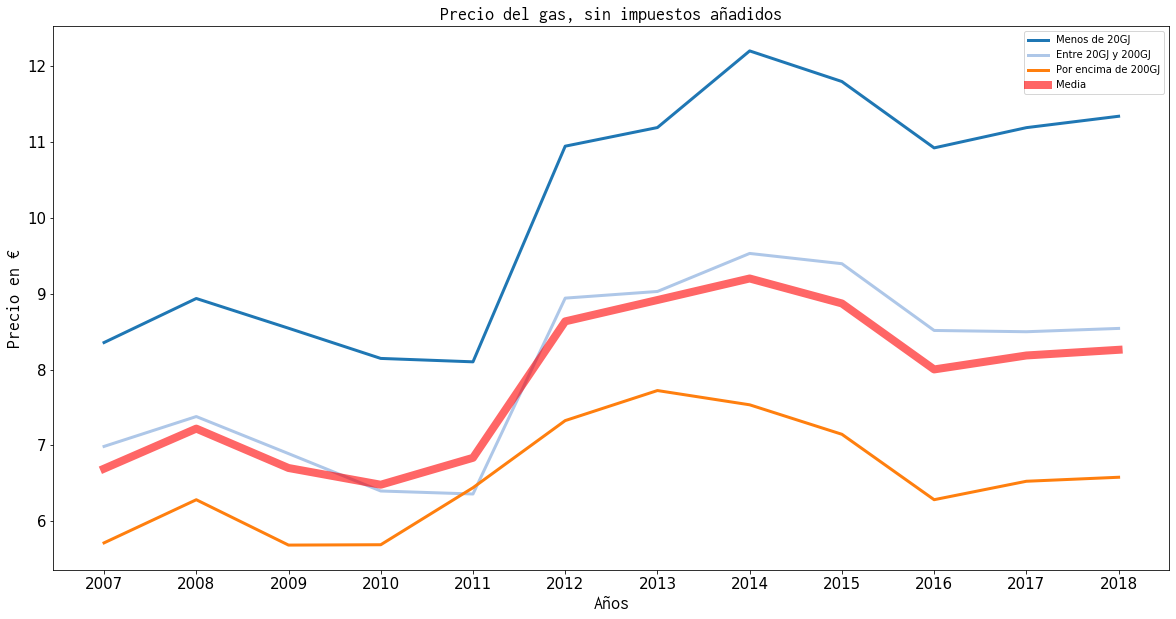

In [67]:
y_data = [gas_prices_anual_less_20gj.Precio, gas_prices_anual_20gj_to_200gl.Precio, gas_prices_anual_over_200gl.Precio]

plt.figure(figsize=(20,10))
for y in range(len(y_data)):
    plt.plot(gas_prices_anual_less_20gj.Semestres, y_data[y], color=tableau20[y], linewidth=3)
del y_data

plt.plot(gas_prices_anual_less_20gj.Semestres, avg_cons_gas, '-r', linewidth = 8, alpha=0.6)

plt.legend(['Menos de 20GJ', 'Entre 20GJ y 200GJ', 'Por encima de 200GJ', 'Media'])
plt.title('Precio del gas, sin impuestos añadidos', text_arguments)
plt.ylabel('Precio en €', text_arguments)
plt.xlabel('Años', text_arguments)
plt.tick_params(axis='both', labelsize=15)

In [73]:
consum_es_hh = consum_es[consum_es.nrg_bal == 'FC_OTH_HH_E']

Text(0.5, 1.0, 'Comparativa de precios de gas (arriba) y electricidad sin impuestos junto al consumo total de energías')

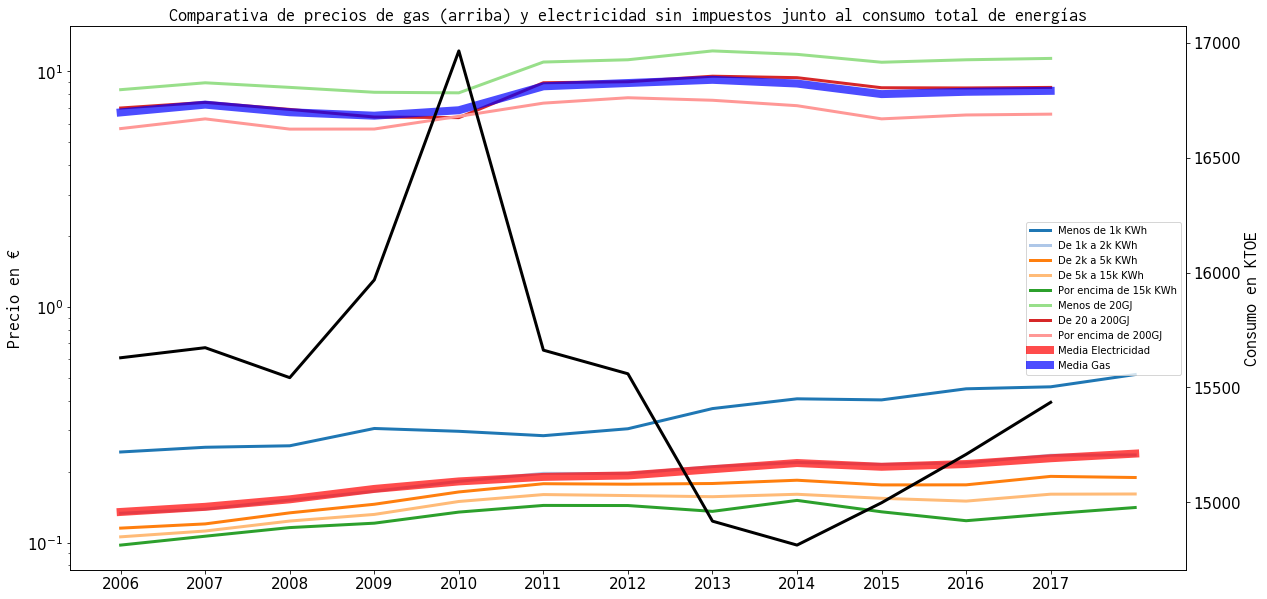

In [79]:
y_data = [elec_prices_anual_less_1k.Precio,
          elec_prices_anual_1k_to_2k.Precio, 
          elec_prices_anual_2k_to_5k.Precio, 
          elec_prices_anual_5k_to_15k.Precio, 
          elec_prices_anual_over_15k.Precio,
          gas_prices_anual_less_20gj.Precio,
          gas_prices_anual_20gj_to_200gl.Precio,
          gas_prices_anual_over_200gl.Precio]

plt.figure(figsize=(20,10))
plt.yscale("log")

for y in range(len(y_data)):
    plt.plot(gas_prices_anual_less_20gj.Semestres, y_data[y], color=tableau20[y], linewidth=3)

del y_data
    
plt.plot(elec_prices_anual_less_1k.Semestres, avg_cons_elec, '-r', linewidth = 8, alpha=0.7)
plt.plot(gas_prices_anual_less_20gj.Semestres, avg_cons_gas, '-b', linewidth = 8, alpha=0.7)
plt.legend(['Menos de 1k KWh', 'De 1k a 2k KWh', 'De 2k a 5k KWh', 'De 5k a 15k KWh', 'Por encima de 15k KWh',
            'Menos de 20GJ', 'De 20 a 200GJ', 'Por encima de 200GJ', 'Media Electricidad', 'Media Gas', 'Consumo Medio'], loc='best')
plt.tick_params(axis='both', labelsize=15)
plt.ylabel('Precio en €', text_arguments)


ax2 = plt.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Consumo en KTOE', text_arguments)
ax2.plot(consum_es_hh.Años, consum_es_hh.Consumo, linewidth=3, color=(0, 0, 0))
ax2.tick_params(axis='y', labelsize=15)

plt.title("Comparativa de precios de gas (arriba) y electricidad sin impuestos junto al consumo total de energías", text_arguments)

##### Comparativa de subida de precios #####

In [80]:
print("Precio en 2008 / Precio en 2019: {:.2f}".format(less_20GJ.iloc[-1] / less_20GJ.iloc[0]))

Precio en 2008 / Precio en 2019: 1.55


In [81]:
print("Precio en 2008 / Precio en 2019: {:.2f}".format(less_1k.iloc[-1] / less_1k.iloc[0]))

Precio en 2008 / Precio en 2019: 2.13


### En cuanto a la accesibilidad para los hogares de los diferentes recursos energéticos:
- Las tarifas de ambas, electricidad y gas, son más caras en sus variantes de menor potencia.
    - Esto puede deberse a que cuanto más compras de un producto, más barato te sale por cada unidad del mismo.
- Los precios han sufrido un crecimiento muy paulatino a lo largo de los años hasta ahora.
    - Sí es remarcable que la tarifa de menos de 1KWh de electricidad ha doblado su precio desde 2008, y la tarifa de menos de 20GJ del gas ha aumentado en un 50% en el mismo periodo.
- No hay una relación apreciable entre el consumo de energía en los hogares y el precio que tienen asociado.

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

<a>

# 4. Cómo de eficiente es cada tipo de energía

# 5. Cuáles son los niveles de contaminación producidos por cada tipo de energía

comtaminacion de CO2 enlace en onenote

# 6. Cómo evoluciona el ritmo de uso de las energías renovables

# 7. Cómo se relacionan éstas energías con las energías renovables